<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3b_OSI_SAF_SST_mapping_Geo_SST.ipynb" target="_blank"><< Mapping Geostationary data satellite</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3d_OSI_SAF_SST_mapping_Metop_AVHRR_granules.ipynb" target="_blank">Mapping Full Resolution Metop AVHRR SST granules >></a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2025 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-osi-saf-sst/HEAD?labpath=1_OSI_SAF_sst_introductory%2F1_3c_OSI_SAF_SST_mapping_MSG_SST.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea surface temperature: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1b_OSI_SAF_SST_data_access_IFREMER_FTP.ipynb" target="_blank">1_1a_OSI_SAF_SST_data_access_IFREMER_FTP.ipynb</a>**
</div>
<hr>

# 1.3c Mapping North Atlantic Regional Sea Surface Temperature

### Data used 

| Dataset | EUMETSAT collection ID | OSI SAF website description | OSI SAF identifier |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| North Atlantic Regional Sea Surface Temperature | EO:EUM:DAT:MULT:OSSTNARN | <a href="https://osi-saf.eumetsat.int/products/osi-202-c" target="_blank">Description</a>| OSI-202-c |


### Learning outcomes

At the end of this notebook you will know;
* How to open NAR SST netcdf
* Map SST using cartopy 

### Outline

We will here plot a last group of OSI SAF **Level 3** SST product: the <a/ href="https://osi-saf.eumetsat.int/products/osi-202-c">North Atlantic Regional Sea Surface Temperature</a>. This product is distributed in two sub-products, retrieved respectively from NOAA-20/VIIRS and Metop-B/AVHRR measurements, which allows to have 4 retrieval per day, with a better spatial resolution as the Global Metop SST product. 

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Defining geographical area](#section1)
 1. [Setting parameters](#section2)
 1. [Map SST](#section3)
 
<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports 
import os                          # a library that allows us access to basic operating system commands
import xarray as xr                # a library that supports the use of multi-dimensional arrays in Python
import matplotlib as mpl           # a library for visualization
import matplotlib.pyplot as plt    # a library that supports plotting
import matplotlib.cm as mpl_cm     # a part of the plotting library that provides colour maps
import cartopy.crs as ccrs         # a mapping library that supports reprojection
import cartopy.feature as cfeature # a part of the mapping library that provides features such as coastlines
import cmocean                     # colormaps for ocean products
import cmcrameri                   # scientific colormaps for data visualisation
import urllib                      # a library that helps us read in remote resources from URLs
from PIL import Image              # a library that helps us plot images
import numpy as np                 # a library that supports array manipulation
import warnings                    # a library that controls python warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')

<div class="alert alert-warning" role="alert">

## <a id='section0'></a>0. Supporting functions
[Back to top](#TOC-TOP)

</div>

Before we begin, we will define shorts functions.

The function name `mapping_sst` create a plot figure of sea surface temperature for a selected file in the directory **dir** with a specific output projection and a specific region of the globe if given.<br>
*note: for the previous ploting notebooks we used a function that ploted **all files** in dir, here we will have to specify **which file we want** to plot*

In [2]:
def mapping_sst(dir, output_projection, cmap, ax=None, title="", region=None): 
    """
    Function to map Sea Surface Temperature. 

    Args:
        dir (string)        : the directory where files are
        output_projection   : the output projection to plot map
        cmap                : color palette
        ax                  : the axis of the plot
        title (sting)       : title of the plot
        region (list)       : the region to zoom in. If not region is given, plot a global map
        
    Returns:
        im                  : the plotting figure

    """
    
    # set data projection
    data_projection=ccrs.PlateCarree()

    # define plot carateristics
    if not ax : ax = plt.axes([0.1,0.1,0.75,0.85], projection=output_projection)
    ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='dimgrey') # Change color of ocean
    ax.add_feature(cfeature.LAND, zorder=0, facecolor='silver') # Change color of land
    ax.gridlines(draw_labels=True) # Add coasrline
    ax.coastlines('10m') # Draw coastline
    # Select region to zooming 
    if region : 
        ax.set_extent(region, crs=output_projection)
    else :
        ax.set_global()
    
    # Add title
    plt.title(title, fontsize=18)

    # open and plot data
    for filename in os.listdir(dir):
        if filename.endswith(".nc"):
            nc = xr.open_dataset(os.path.join(dir, filename))
            lat = nc.variables['lat'][:]    
            lon = nc.variables['lon'][:]
            sst = nc.variables['sea_surface_temperature'][:]
            ql  = nc.variables['quality_level'][:]
            nc.close()

            # Use only SST with quality_level > 2
            sst_ql345 = np.ma.masked_where(ql<3, sst)
            
            SST = sst_ql345[0,:,:]-273.15
            # plotting sst
            im = plt.pcolormesh(lon, lat, SST, transform=data_projection, cmap=cmap)

            # set the min and max temperature for apropriate visualisation
            # As we are going to plot several products and try to compare them, we need to have a fixed common palette. 
            # The one we used in the previous chapter will set a palette for each data file read depending on the min/max in the file.
            # im.set_clim(np.nanmin(SST),np.nanmax(SST))
            # we will here rather use a -2°C/36°C palette
            im.set_clim(-2,36)
            
    return im

The function name `add_colorbar` create a colorbar of the image im.

In [3]:
def add_colorbar(im, fig, orientation, cmap, discrete=False, extend='neither'):
    """
    Function to add a colormap. 

    Args:
        im                         : image
        fig                        : figure
        orientation (string)       : the orientation of colorbar (horizontal or vertical)
        cmap                       : color palette
        dicrete (bool)             : add discrete color
        extend                     : extension type of the colorbar (neither, max, min or both) 

    """
    
    if orientation == 'horizontal':
        axc = fig.add_axes((0.1,0.1,0.75,0.02))
        ax = fig.add_axes([0.43,0.12,0.1,0.05], anchor='S', zorder=-1 )
    else :
        axc = fig.add_axes((0.85,0.2,0.02,0.85))
        ax = fig.add_axes([0.8,.1,0.1,0.05], anchor='S', zorder=-1 )

    if discrete:
        bounds = range(int(im.get_clim()[0]),int(im.get_clim()[1]))
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        cb = plt.colorbar(im, orientation=orientation, cax=axc, extend=extend, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds)
    else:
        cb = plt.colorbar(im, orientation=orientation, cax=axc, extend=extend)
    
    url = "https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSISAF_Name_Colour.png"
    logo = np.array(Image.open(urllib.request.urlopen(url)))
    
    ax.imshow(logo)
    ax.axis('off')
    
    cb.set_label('SST [°C]', fontsize=18)
    cb.ax.tick_params(labelsize=14)

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting parameters
[Back to top](#TOC-TOP)

</div>

As this product is just about North Atlantic, we will zoom our maps on this area.

In [4]:
# setting geographical area
lon_min = -70
lon_max = 60
lat_min = 20
lat_max = 80

Setting directories where to read data files

In [5]:
directory_NOAA = os.path.join(os.getcwd(), 'products', 'L3_NAR', 'NOAA-20')
directory_Metop = os.path.join(os.getcwd(), 'products', 'L3_NAR', 'Metop-B')

Choose a colormap for your data set. <br>
For memory :
* <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">matplotlib colormaps</a>
* <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a>

In [6]:
cmap = mpl_cm.get_cmap('RdYlBu_r')
#cmap = mpl_cm.get_cmap('inferno')
#cmap = cmocean.cm.thermal

We will set the dates to automate the title

<div class="alert alert-info" role="alert">

## <a id='section1'></a>2. Mapping NAR SST products
[Back to top](#TOC-TOP)

</div>

### NOAA-20 Data
Let's first plot the data we downloaded from NOAA-20 satellite in our zone of interest.

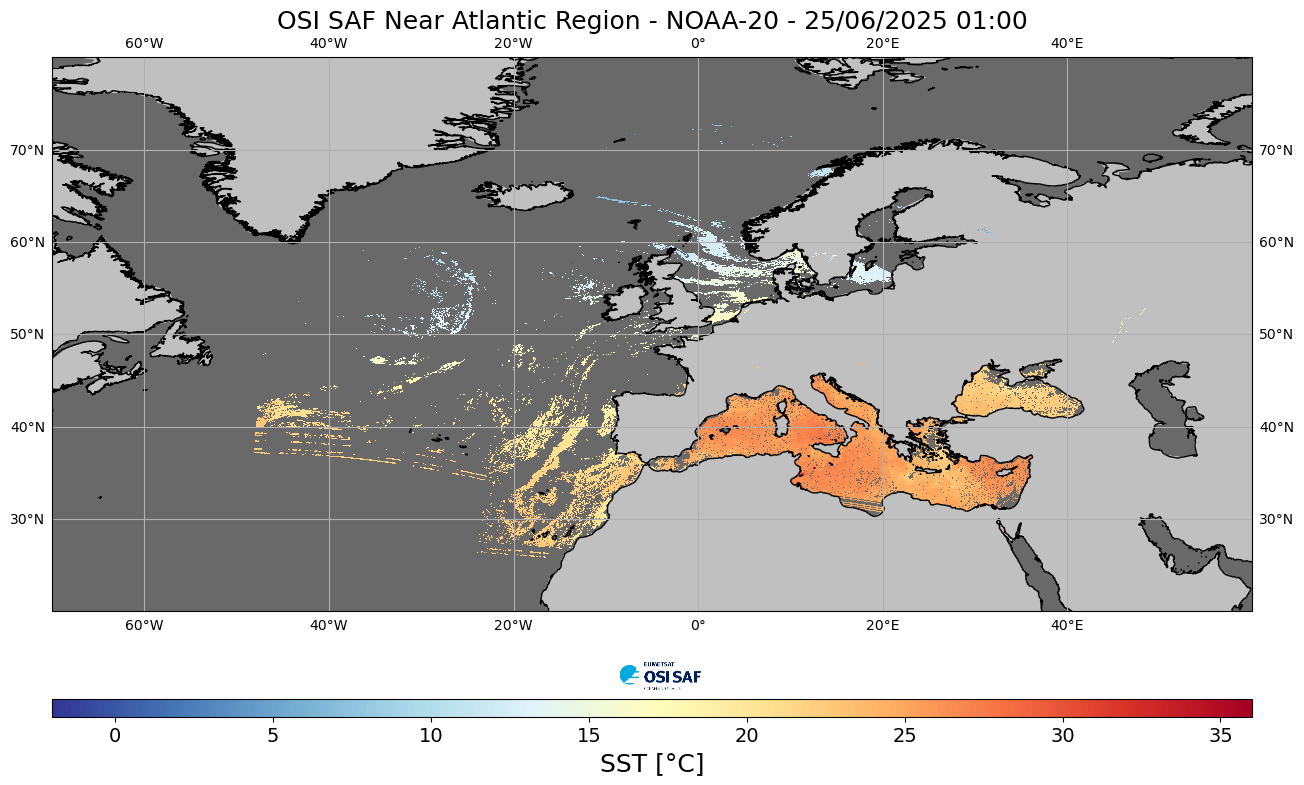

In [7]:
# Create a figure 
fig = plt.figure(figsize=(16,9))

# Add output projection type 
output_projection=ccrs.PlateCarree()

# Mapping MSG 0 data
im = mapping_sst(directory_NOAA, 
                 output_projection, 
                 cmap,
                 title='OSI SAF Near Atlantic Region - NOAA-20 - 25/06/2025 01:00',
                 region=[lon_min, lon_max, lat_min, lat_max])

# Adding an horizontal colorbar       
add_colorbar(im, fig, 'horizontal', cmap)

#### Composite map
Let's try to make a composite figure with "earth view" of the product, and the zoomed in figure here above to have an overview of the product extent.

(We'll use the Orthographic projection from the <a href="https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html" target="_blank">cartopy catalogue</a>, and centered our view on the product).

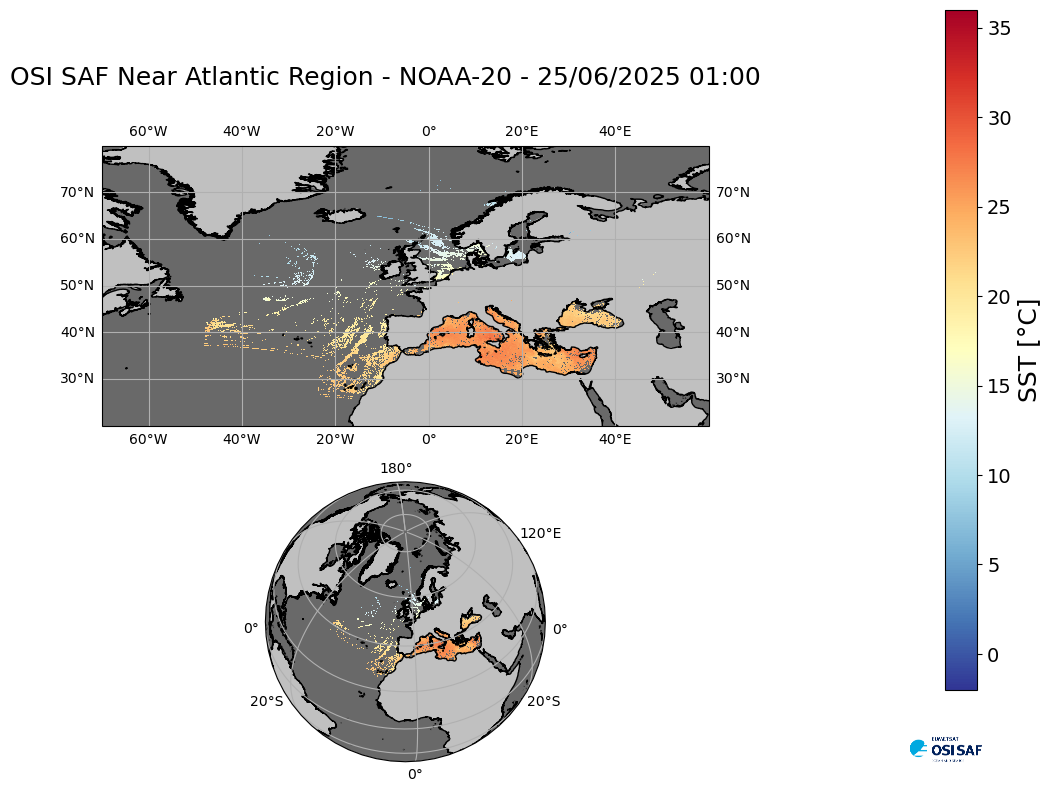

In [8]:
fig = plt.figure(figsize=(16,8))
fig.suptitle('OSI SAF Near Atlantic Region - NOAA-20 - 25/06/2025 01:00', fontsize=18)

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection1 = ccrs.PlateCarree()
output_projection2=ccrs.Orthographic((lon_max+lon_min)/2,(lat_max+lat_min)/2)


# define axis and title
ax1 = plt.subplot(2,1,1, projection=output_projection1)
# Mapping sst
im1 = mapping_sst(directory_NOAA,  
                 output_projection1, 
                 cmap,
                 ax=ax1,
                 region=[lon_min, lon_max, lat_min, lat_max]) 

# define axis and title
ax2 = plt.subplot(2,1,2, projection=output_projection2)
# Mapping sst
im2 = mapping_sst(directory_NOAA, 
                 output_projection2, 
                 cmap,
                 ax=ax2)

add_colorbar(im1, fig, orientation="vertical", cmap=cmap)

### Metop-B Data
Let's follow the same steps with Metop B we downloaded.

#### Global Map
Strating by mapping the Metop-B data using regional view a Plate Carree projection.

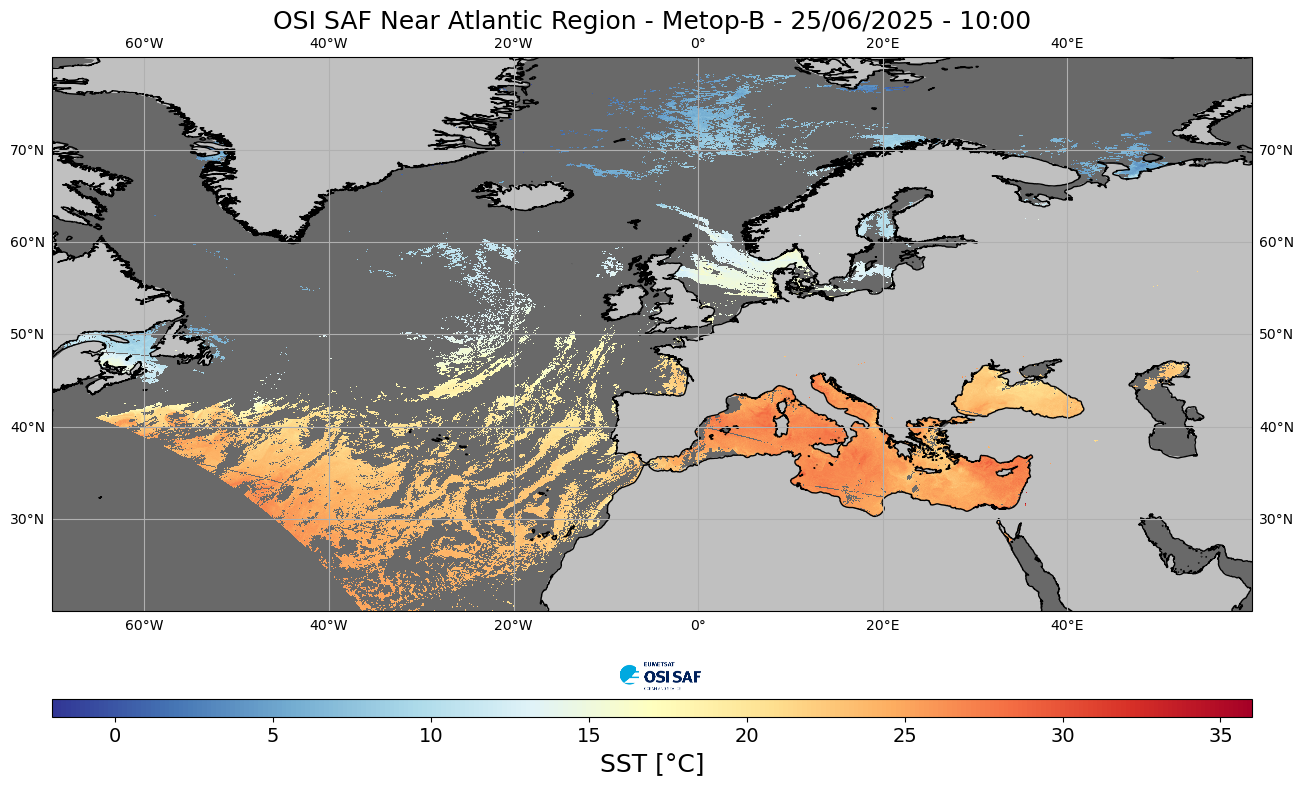

In [9]:
# Create a figure 
fig = plt.figure(figsize=(16,9))

# Add output projection type 
output_projection=ccrs.PlateCarree()

# Mapping MSG 0 data
im = mapping_sst(directory_Metop, 
                 output_projection, 
                 cmap,
                 title="OSI SAF Near Atlantic Region - Metop-B - 25/06/2025 - 10:00", 
                 region=[lon_min, lon_max, lat_min, lat_max])

# Adding an horizontal colorbar       
add_colorbar(im, fig, 'horizontal', cmap)

#### Composite map
Let's now make a composite figure with "earth view" of the product, and the zoomed in figure here above to have an overview of the product extent.

(We'll use the Orthographic projection from the <a href="https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html" target="_blank">cartopy catalogue</a>, and centered our view on the product).

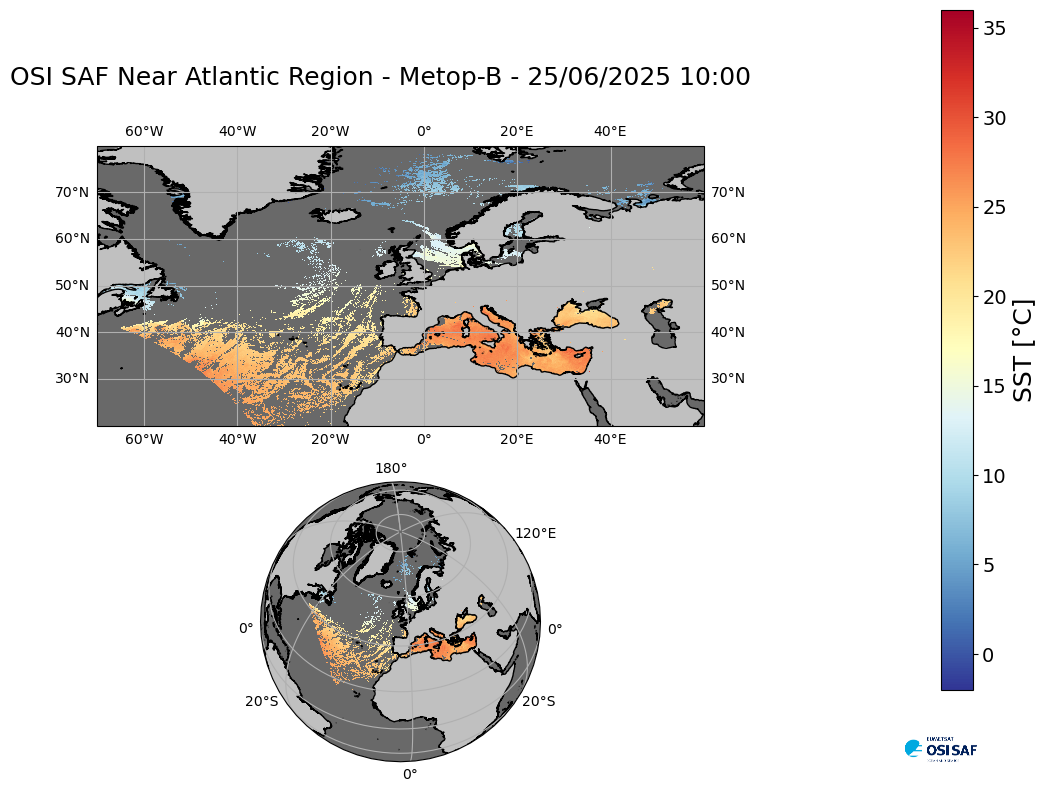

In [10]:
fig = plt.figure(figsize=(16,8))
fig.suptitle('OSI SAF Near Atlantic Region - Metop-B - 25/06/2025 10:00', fontsize=18)

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection1 = ccrs.PlateCarree()
output_projection2=ccrs.Orthographic((lon_max+lon_min)/2,(lat_max+lat_min)/2)


# define axis and title
ax1 = plt.subplot(2,1,1, projection=output_projection1)
# Mapping sst
im1 = mapping_sst(directory_Metop,  
                 output_projection1, 
                 cmap,
                 ax=ax1,
                 region=[lon_min, lon_max, lat_min, lat_max]) 

# define axis and title
ax2 = plt.subplot(2,1,2, projection=output_projection2)
# Mapping sst
im2 = mapping_sst(directory_Metop, 
                 output_projection2, 
                 cmap,
                 ax=ax2)

add_colorbar(im1, fig, orientation="vertical", cmap=cmap)

To better spot the difference, let's map both regional Plate Caree projection side by side.

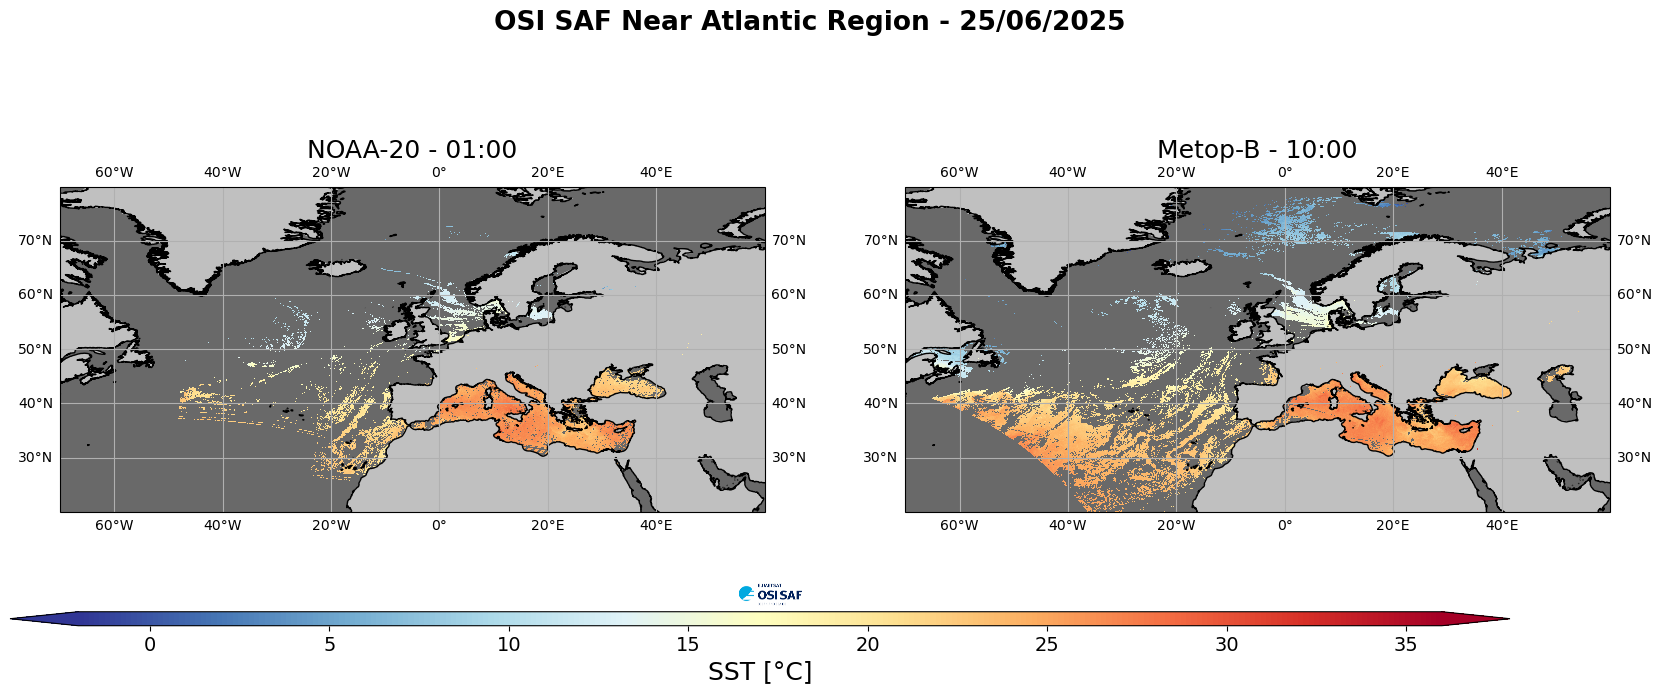

In [11]:
fig = plt.figure(figsize=(20,7))
fig.suptitle('OSI SAF Near Atlantic Region - 25/06/2025', fontsize=19, fontweight='semibold')
# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection = ccrs.PlateCarree()


# define axis and title
ax1 = plt.subplot(1,2,1, projection=output_projection)
# Mapping sst
im1 = mapping_sst(directory_NOAA,  
                 output_projection, 
                 cmap,
                 title='NOAA-20 - 01:00',
                 ax=ax1,
                 region=[lon_min, lon_max, lat_min, lat_max]) 

# define axis and title
ax2 = plt.subplot(1,2,2, projection=output_projection)
# Mapping sst
im2 = mapping_sst(directory_Metop, 
                 output_projection, 
                 cmap,
                 title='Metop-B - 10:00',
                 ax=ax2,
                 region=[lon_min, lon_max, lat_min, lat_max])

add_colorbar(im1, fig, orientation="horizontal", cmap=cmap,  extend='both')

The difference of satellite coverage between the NOAA-20 SST product and Metop-B SST product comes from the fact that the NOAA-20 one in done with data acquired directly from the satellite as it is accessible from Meteo-France's Center for Satellite Meteorology in <a href="https://en.wikipedia.org/wiki/Lannion">Lannion</a>, while the Metop-B data are processed from data recieved there from EUMETSAT distribution.


<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3b_OSI_SAF_SST_mapping_Geo_SST.ipynb" target="_blank"><< Mapping Geostationary data satellite</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_3d_OSI_SAF_SST_mapping_Metop_AVHRR_granules.ipynb" target="_blank">Mapping Full Resolution Metop AVHRR SST granules >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>